Import modules

In [1]:
import tensorflow as tf
from helper import *

%matplotlib inline
%load_ext autoreload
%autoreload 2
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
tf.__version__
# tf.compat.v1.disable_eager_execution()
# matplotlib.rc('axes', labelsize=18) 
# matplotlib.rc('figure', titlesize=18) 

'2.1.0'

Create sliding window of the 4 original dataset

start the sliding window generation process

In [ ]:
images = load_images_from_folder(ORIGINAL)

counter = 0
for image in images:
	classPath = os.path.join(TRAIN, classes[counter])
	if not os.path.exists(classPath):
		os.mkdir(classPath)
	sliding_window(image, 3, (448, 448), classPath)
	counter+=1

Apply sliding window on al

In [ ]:
images = load_images_from_folder('orig_Al')
classPath = os.path.join(TRAIN, 'al')
if not os.path.exists(classPath):
    os.mkdir(classPath)
sliding_window(images[0], 3, IMAGE_SIZE, classPath)

Read generated sliding window and do data augmentation 
by randomly seleft and random flips

Found 12030 images belonging to 3 classes.
{'300.9': 0, '600.3': 1, '600.9': 2}


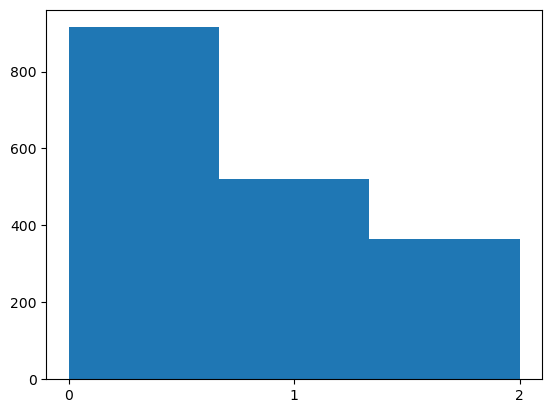

(array([915, 521, 364], dtype=int64),
 array([0.       , 0.6666667, 1.3333334, 2.       ], dtype=float32))

In [3]:
aug = ImageDataGenerator(
		# horizontal_flip=True,
		# vertical_flip=True,
		fill_mode="nearest")


augmentation = aug.flow_from_directory(imgDir, classes=classes, batch_size = TRAINING_SIZE, target_size=IMAGE_SIZE, shuffle=True, seed=20, class_mode="sparse")
print(augmentation.class_indices)
for x, y in augmentation:
	data = x
	labels = y
	break
data = preprocess_input(data)
fig = plt.figure()
fig.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.hist(labels, len(classes))
plt.show()
np.histogram(labels, bins=3)


Draw figure of original pics

In [ ]:
fig = plt.figure(figsize=(32, 16))
counter = 1
for subdir, dirs, files in os.walk('orig'):
	for file in files:
		origImg = cv2.imread(os.path.join(subdir, file))
		fig.add_subplot(1, 4, counter)
		plt.axis('off')
		plt.imshow(origImg)
		counter += 1
plt.savefig('original.png', transparent=True, dpi=300)
plt.show()


Figure X: The four original dataset. 

Draw figure for augmented pics

In [ ]:
drawing = data.astype(np.uint8)
fig = plt.figure(figsize=(16, 16))
counter = 1
idx = np.random.choice(np.where(labels == 0)[0], 4)
for j in idx:
	fig.add_subplot(2, 2, counter)
	plt.axis('off')
	plt.imshow(drawing[j])
	counter += 1


plt.savefig('sample_300.9.png', transparent=True, dpi=300)
plt.show()


fig = plt.figure(figsize=(16, 16))
counter = 1
idx = np.random.choice(np.where(labels == 1)[0], 4)
for j in idx:
	fig.add_subplot(2, 2, counter)
	plt.axis('off')
	plt.imshow(drawing[j])
	counter += 1
plt.savefig('sample_600.3.png', transparent=True, dpi=300)
plt.show()

fig = plt.figure(figsize=(16, 16))
counter = 1
idx = np.random.choice(np.where(labels == 2)[0], 4)
for j in idx:
	fig.add_subplot(2, 2, counter)
	plt.axis('off')
	plt.imshow(drawing[j])
	counter += 1
plt.savefig('sample_600.9.png', transparent=True, dpi=300)
plt.show()


Figure X: Some sample of augmented dataset

extract features

Construct the VGG 16 network

In [4]:
input_tensor = ks.Input(data.shape[1:])

network = VGG19(weights=None, include_top=False, input_tensor=input_tensor, pooling=None)
network.load_weights(VGG_19_WEIGHTS_PATH)
#network = ks.Model(input_tensor, vgg16(input_tensor))
network.summary()
#features = network.predict(data)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 448, 448, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 448, 448, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 448, 448, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 224, 224, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 224, 224, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 224, 224, 128)     147584    
______________________________________________

Get functors for the gram matrix for each layers for a whole batch

In [4]:
feature_layers = ['block1_pool', 'block2_pool',
                  'block3_pool', 'block4_pool',
                  'block1_conv1']
layers = dict([(layer.name, layer.output) for layer in network.layers])
all_grams = []
for layer_name in feature_layers:
    style_features = layers[layer_name]
    gram = gram_matrix_batch(style_features)
    all_grams.append(gram)

functor = K.function(input_tensor, all_grams)


Generate Image from a single Image. 

In [5]:
IMAGE_PATH = "sim1.png"

orig = imread(IMAGE_PATH)[np.newaxis, :, :, :]
preprocess_input(orig)

generated = generateImageFromStyle(H=IMAGE_SIZE[0], W=IMAGE_SIZE[1], C=3, S_weight=1.0, V_weight=0, style_image=orig, iters=20)
generated = deprocess_image(generated)

Start of iteration 0
Current loss value: 323048500000.0
Iteration 0 completed in 15s
Start of iteration 1
Current loss value: 91972090000.0
Iteration 1 completed in 10s
Start of iteration 2
Current loss value: 57462723000.0
Iteration 2 completed in 10s
Start of iteration 3
Current loss value: 44565414000.0
Iteration 3 completed in 10s
Start of iteration 4
Current loss value: 38092124000.0
Iteration 4 completed in 10s
Start of iteration 5
Current loss value: 34012905000.0
Iteration 5 completed in 12s
Start of iteration 6
Current loss value: 31262503000.0
Iteration 6 completed in 10s
Start of iteration 7
Current loss value: 29090351000.0
Iteration 7 completed in 10s
Start of iteration 8
Current loss value: 27335127000.0
Iteration 8 completed in 10s
Start of iteration 9
Current loss value: 25580872000.0
Iteration 9 completed in 10s
Start of iteration 10
Current loss value: 24102880000.0
Iteration 10 completed in 11s
Start of iteration 11
Current loss value: 22659557000.0
Iteration 11 comp

Get the gram matrix value, this function split the entire input into small batches to avoid OOM

In [ ]:
imsave('simg_enerated.png', generated)

plt.figure()
plt.axis('off')
plt.imshow(generated)
plt.show()

In [10]:
features = get_gram_batch(data, functor)
features.shape

UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node block1_conv1/Conv2D}}]]
	 [[Reshape_39/_423]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node block1_conv1/Conv2D}}]]
0 successful operations.
0 derived errors ignored.

Feature extraction method

In [ ]:
features_old = network.predict(data)
features_old = features_old.reshape((features_old.shape[0],-1))

Evaluate and plot accuracies of different models

In [ ]:
"""
New Method: Gram matrix
"""

explainations = []

for i in range(2, 11):
    pca = PCA(n_components=i)
    pca.fit(features)
    explainations.append(np.sum(pca.explained_variance_ratio_))

accuracies = dict()
accuracies_old = dict()
accuracies['LinearSVM'] = await asyncio.gather(*[evaluateSVM_PCA(i, features, labels, 'linear') for i in range(2, 11)])

# """
# Old method: Feature Extraction
# """

accuracies_old['LinearSVM'] = await asyncio.gather(*[evaluateSVM_PCA(i, features_old, labels, 'linear') for i in range(2, 11)])
accuracies_old['3Poly'] = await asyncio.gather(*[evaluateSVM_PCA(i, features_old, labels, 'poly') for i in range(2, 11)])
accuracies_old['RBF'] = await asyncio.gather(*[evaluateSVM_PCA(i, features_old, labels, 'rbf') for i in range(2, 11)])

plot accuracies with different SVM and PCA components

In [ ]:
fig = plt.figure()
fig.add_subplot()
x = range(2,11)
plt.plot(x, accuracies['LinearSVM'])
plt.plot(x, accuracies_old['LinearSVM'])
plt.plot(x, accuracies_old['3Poly'])
plt.plot(x, accuracies_old['RBF'])

fig.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['LinearSVM (Gram Matrix)', 'LinearSVM (Feature Extraction)', '3Degree (Feature Extraction)', 'RBF (Feature Extraction)'])

plt.xlabel('# of Principal Components')
plt.ylabel('Accuracy')

plt.savefig('acc_vs_npc.png', dpi=300)
plt.show()

In [ ]:
fig = plt.figure()
fig.add_subplot()
x = range(2,11)
plt.bar(x, accuracies['LinearSVM'])
plt.xticks(x)
fig.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
#plt.legend(['LinearSVM'])

# plt.xlabel('Number of Principal Components')
 
# plt.ylabel('classification Accuracy')

plt.savefig('acc_vs_npc.png', dpi=300)
plt.show()


fig = plt.figure()
fig.add_subplot()
x = range(2,11)
plt.bar(x, explainations)
plt.xticks(x)
fig.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
#plt.legend(['LinearSVM'])

# plt.xlabel('Number of Principal Components')
 
# plt.ylabel('classification Accuracy')

plt.savefig('exp_vs_npc.png', dpi=300)
plt.show()

Figure X: Accuracy vs number of principal comnponents. 
Tested on three SVM models. 
A normal SVM model
with no kernel. A SVM model with 3 degree polynomial kernel 
and a SVM with radial basis kernel

Train the classifer with dimension=8 and evaluate the result

In [ ]:
pca = PCA(n_components=N_PC)
X_train_, X_test_, y_train_, y_test_ = train_test_split(features, labels, shuffle=False, test_size=0.2)
X_train = pca.fit_transform(X_train_)

X_test = pca.transform(X_test_)
pcaFeatures = pca.transform(features)
X_train, X_test, y_train, y_test = train_test_split(pcaFeatures, labels, shuffle=False, test_size=0.2)


draw the confusion matrix

In [ ]:
model = svm.LinearSVC(max_iter=200000)
model.fit(X_train, y_train)
disp = plot_confusion_matrix(model, X_test, y_test, display_labels=CLASS_LABELS, normalize='true', cmap=plt.cm.Blues)
#disp.ax_.set_title('Confusion Matrix', fontsize=18)
plt.savefig('confmat.png', dpi=300)
plt.show()

Figure X: Confusion matrix of the optimal model. 

Draw the scatter plot (PCA reduced domain) visualize feature using first two components of PCA

In [ ]:
fig = plt.figure()
# fig.add_subplot()

counter = 1
for i in range(3):
		idx = np.where(labels == i)
		plt.scatter(pcaFeatures[idx[0], 0], pcaFeatures[idx[0], 1], s=4)

plt.legend(CLASS_LABELS)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')

plt.savefig('pca.png', dpi=300)
plt.show()


Figure X: Plot of first two princial components of the dataset 

Draw the first 2 PCs in the reduced domain. with the validation data darkened. 

In [ ]:
y_pred = model.predict(X_test)
counter = 1
fig, ax = plt.subplots()
global COLORS
COLORS = [(0.2, 0.2, 1), (0.2, 1, 0.2), (1, 0.2, 0.2), (0, 0, 0.5), (0, 0.5, 0), (0.5, 0, 0)]
for i in range(3):
		idx = np.where(y_train == i)
		ax.scatter(X_train[idx[0], 0], X_train[idx[0], 1], s=4, c=[COLORS[i]])

for i in range(3):
		idx = np.where(y_pred == i)
		ax.scatter(X_test[idx[0], 0], X_test[idx[0], 1], s=4, c=[COLORS[i+3]])
legends = ['M1 Train', 'M2 Train', 'M3 Train', 'M1 Pred', 'M2 Pred', 'M3 Pred']
lgd = ax.legend(legends, bbox_to_anchor=(1.21, 0.5), loc='center right', borderaxespad=0, frameon=False)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')

plt.savefig('pca_validation_set.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.clf()

Figure X: Plot of first two princial components of the dataset (validation dataset)

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=60)
y_pred = model.predict(X_test)
COLORS = [(0.2, 0.2, 1), (0.2, 0.8, 0.2), (1, 0.2, 0.2), (0, 0, 0.5), (0, 0.5, 0), (0.5, 0, 0)]

counter = 1
for i in range(3):
		idx = np.where(y_train == i)
		ax.scatter(X_train[idx[0], 0], X_train[idx[0], 1], X_train[idx[0], 2], s=4, c=[COLORS[i]])

for i in range(3):
		idx = np.where(y_test == i)
		ax.scatter(X_test[idx[0], 0], X_test[idx[0], 1], X_test[idx[0], 2], s=4, c=[COLORS[i+3]])
legends = ['M1 Train', 'M2 Train', 'M3 Train', 'M1 Test', 'M2 Test', 'M3 Test']
lgd = ax.legend(legends, bbox_to_anchor=(1.20, 0.5), loc='center right', borderaxespad=0, frameon=False)
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
plt.savefig('pca_validation_set.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

Put the entire 300.3 in the plot, also add the centroid

In [ ]:
drawThingsOnReducedDomain3D(pcaFeatures, labels, [], [], 'pca_empty_transparent.3D.png', [], [], [], [])

In [ ]:
aug = ImageDataGenerator(fill_mode="nearest")

augmentation = aug.flow_from_directory(imgDir,classes=[classes_all[0]], batch_size = TRAINING_SIZE_SMALL, target_size=IMAGE_SIZE,shuffle=True, seed=20, class_mode="sparse")
print(augmentation.class_indices)
for x, y in augmentation:
	data_300 = x
	labels_300 = y
	break
data_300 = preprocess_input(data_300)
features_300 = get_gram_batch(data_300)
pcaFeatures_300 = pca.transform(features_300)

centroid = np.mean(pcaFeatures_300, axis=0)


In [ ]:
drawThingsOnReducedDomain(pcaFeatures, labels, [pcaFeatures_300, centroid[np.newaxis, :]], ['M4', 'Centroid'], 'pca_with300.3.png', [None, None], [4, 400], [None, '*'], [None, None])
drawThingsOnReducedDomain3D(pcaFeatures, labels, [pcaFeatures_300, centroid[np.newaxis, :]], ['M4', 'Centroid'], 'pca_with300.3D.png', [None, None], [4, 400], [None, '*'], [0.3, None])

Read new Al dataset and project those onto the reduced domain

Draw Al on Plot

In [ ]:
generatedM7 = generateFromReducedDomain(centroid, pca)
imsave('300.3_centroid_generated.png', generatedM7)

plt.figure()
plt.axis('off')
plt.imshow(generatedM7)
plt.show()

In [ ]:
aug_Al = ImageDataGenerator(
		fill_mode="nearest")

augmentation_Al = aug_Al.flow_from_directory(TRAIN, classes=CLASSES_AL, batch_size = TRAINING_SIZE_SMALL, target_size=IMAGE_SIZE,shuffle=True, seed=20, class_mode="sparse")
print(augmentation_Al.class_indices)
for x, y in augmentation_Al:
	data_Al = x
	labels_Al = y
	break

features_Al = get_gram_batch(data_Al)
features_Al.shape

pcaFeatures_Al = pca.transform(features_Al)

In [ ]:
drawThingsOnReducedDomain3D(pcaFeatures, labels, [pcaFeatures_Al], ['Al'], 'pca_with_Al.png', [None, None], [4], ['.'], [None])

Put new image in the plot

Calculate the variance and the restore error and the centroid

In [ ]:
M4 = pcaFeatures_300
restoredM4 = pca.inverse_transform(M4)
M4_orig = features_300

idx = np.where(labels == 0)
M1 = pcaFeatures[idx]
restoredM1 = pca.inverse_transform(M1)
M1_orig = features[idx]

restoredAl = pca.inverse_transform(pcaFeatures_Al)

valRestored = pca.inverse_transform(X_test)
valOrig = X_test_

from sklearn.metrics import mean_squared_error

zeros = np.zeros(M4_orig.shape)

errM4 = mean_squared_error(M4_orig, restoredM4) / mean_squared_error(M4_orig, zeros)
errAl = mean_squared_error(features_Al, restoredAl) / mean_squared_error(features_Al, zeros)


print(errM4, errAl)
print(1-errM4, 1-errAl)
# from sklearn.metrics import explained_variance_score

# expM1 = explained_variance_score(M1_orig, restoredM1)
# expM4 = explained_variance_score(M4_orig, restoredM4)
# expAl = explained_variance_score(features_Al, restoredAl)
# expVal = explained_variance_score(valOrig, valRestored)
# print(expM1, expM4, expAl, expVal)

# print(mse)
# print(mse / np.sum(M4_orig**2))

# print(mseAl)
# print(mseAl / np.sum(features_Al**2))
# print(np.mean(pcaFeatures_Al, axis=0))


In [ ]:
expVar = np.sum(pca.explained_variance_)
origVar = np.sum(np.var(features_300, axis=0))
print(expVar)
origVar

Generate new sample from image 600.3 (label=2)

In [ ]:
idx = np.random.choice(np.where(labels == 1)[0], 1)
styleImg = data[idx]

generated = generateImageFromStyle(H=IMAGE_SIZE[0], W=IMAGE_SIZE[1], C=3, S_weight=STYLE_WEIGHT, V_weight=TOTAL_VARIATION_WEIGHT, style_image=styleImg, iters=20)

Show the generated image and project it to the reduced domain

In [ ]:
generated = deprocess_image(generated)
fig = plt.figure()
plt.axis('off')
plt.imshow(generated)

fig = plt.figure()
plt.axis('off')
plt.imshow(styleImg[0].astype(np.uint8))

imsave('generated.png', generated)
imsave('style.png', styleImg[0].astype(np.uint8))

projectImage(generated, pca, pcaFeatures)
projectImage(styleImg[0].astype(np.uint8), pca, pcaFeatures)

Try to figure out the validity of the generated image. 

In [ ]:
correcoeHist(styleImg[0, :, :, :], generated.astype(np.float32))

In [ ]:
GENERATED_IMG = 'generated300.3_0VAR.png'
ORIGINAL_IMG = '600.3_.png'
img = imread(GENERATED_IMG)
img2 = imread(ORIGINAL_IMG)

# plt.hist(img[:, :, 0].ravel(),256,[0,256])
# plt.show()
# plt.hist(img[:, :, 1].ravel(),256,[0,256])
# plt.show()
# plt.hist(img[:, :, 2].ravel(),256,[0,256])
# plt.show()


In [ ]:
# plt.hist(img2[:, :, 0].ravel(),256,[0,256])
# plt.show()
# plt.hist(img2[:, :, 1].ravel(),256,[0,256])
# plt.show()
# plt.hist(img2[:, :, 2].ravel(),256,[0,256])
# plt.show()

First figure: Projection of randomly generated image, 2nd figure: point image generated from

Try to generate in-between data

generate in-between sampels from 300.9, 600.9

In [ ]:
M7Point = centroid
"""
M5 = M2 and M3 
M6 = M1 and M3
"""
idxA = np.random.choice(np.where(labels == 1)[0], 1)
idxB = np.random.choice(np.where(labels == 2)[0], 1)
imgA = data[idxA]
imgB = data[idxB]
generatedM5, M5Point = generateInBetween(imgA[0, :, :, :], imgB[0, :, :, :], pca)

idxA = np.random.choice(np.where(labels == 0)[0], 1)
idxB = np.random.choice(np.where(labels == 2)[0], 1)
imgA = data[idxA]
imgB = data[idxB]
generatedM6, M6Point = generateInBetween(imgA[0, :, :, :], imgB[0, :, :, :], pca)

# for i in range(0, N_PC):
#     M5Point[i] = np.random.uniform(np.min(pcaFeatures[:, i]), np.max(pcaFeatures[:, i]))
# generatedM5 = generateFromReducedDomain(M5Point, pca)

# for i in range(0, N_PC):
#     M6Point[i] = np.random.uniform(np.min(pcaFeatures[:, i]), np.max(pcaFeatures[:, i]))
# generatedM6 = generateFromReducedDomain(M6Point, pca)


imsave('in-between_predictM5.png', generatedM5)
imsave('in-between_predictM6.png', generatedM6)

fig = plt.figure()
plt.axis('off')
plt.imshow(generatedM5)
plt.show()

fig = plt.figure()
plt.axis('off')
plt.imshow(generatedM6)
plt.show()

In [ ]:

M7Point = centroid
locFile = open('locations.txt', 'w')
locFile.write( "300.3 Centroid: \n" + str(M7Point) + "\n")
locFile.write( "M5 Pt: \n" + str(M5Point) + "\n")
locFile.write( "M6 Pt: \n" + str(M6Point) + "\n")

centroids = []
for i in range(3):
    idx = np.where(labels == i)
    centroids.append(np.mean(pcaFeatures[idx[0], :], axis=0))

locFile.write( "M1-M3 centroids: \n" + str(centroids) + "\n")
locFile.close()


In [ ]:

# M5Point = projectImage(generatedM5.astype(np.float32), pca, pcaFeatures)
# M6Point = projectImage(generatedM6.astype(np.float32), pca, pcaFeatures)
# M7Point = projectImage(generatedM7.astype(np.float32), pca, pcaFeatures)

drawThingsOnReducedDomain(pcaFeatures, labels, [M5Point[np.newaxis, :], M6Point[np.newaxis, :], M7Point[np.newaxis, :]], ['M5', 'M6', 'M7'], 'random_and_300.3_generation_projection.png', [None,  [(0.8, 0.8, 0.2)], None], [400, 400, 400], ['*', '*', '*'], [None, None, None, ])
drawThingsOnReducedDomain3D(pcaFeatures, labels, [M5Point[np.newaxis, :], M6Point[np.newaxis, :], M7Point[np.newaxis, :]], ['M5', 'M6', 'M7'], 'random_and_300.3_generation_projection3D.png', [None, [(0.8, 0.8, 0.2)], None], [400, 400, 400], ['*', '*', '*'], [None, None, None, ])


# plt.figure()
# for i in range(3):
#     idx = np.where(labels == i)
#     plt.scatter(pcaFeatures[idx, 0], pcaFeatures[idx, 1], s=4)

# plt.scatter(rand_point[0], rand_point[1], s=400, marker='x')

In [ ]:
idxA = np.random.choice(np.where(labels == 0)[0], 1)
idxB = np.random.choice(np.where(labels == 2)[0], 1)
imgA = data[idxA]
imgB = data[idxB]
generated = generateInBetween(imgA[0, :, :, :], imgB[0, :, :, :], pca)


Show the in-between data in plot

In [ ]:
"""
NOT USED ANYMORE
"""

fig = plt.figure()
plt.axis('off')
plt.imshow(generatedM5)
fig = plt.figure()
plt.axis('off')
plt.imshow(imgA[0, :, :, :].astype(np.uint8))
fig = plt.figure()
plt.axis('off')
plt.imshow(imgB[0, :, :, :].astype(np.uint8))

imsave('in-between.png', generated)
# projectImage(generated.astype(np.float32), pca, pcaFeatures)

Figure X: Put new data in the scatter plot

Project 2 images used to generate in-between data to the plot

In [ ]:

projectImage(imgA[0, :, :, :], pca, pcaFeatures)
projectImage(imgB[0, :, :, :], pca, pcaFeatures)

In [ ]:
import gc
gc.collect()

Starting point=centrorid of M3

In [ ]:
idx = np.where(y_train == 2)
std = np.std(X_train[idx[0],:], axis=0)
mean = np.mean(X_train[idx[0],:], axis=0)
# idx = np.random.choice(np.where(y_train == 2)[0], 1)
startPoint = mean
stepSize = std
stepSize[0] *= 4
stepSize[1:] *= 2



# combination_image = K.placeholder((1,) + IMAGE_SIZE + (3,))
# input_tensor = K.concatenate([combination_image], axis=0)
input_tensor = ks.Input(IMAGE_SIZE + (3,))
vgg19 = VGG19(input_tensor=input_tensor, weights='imagenet',
                include_top=False, pooling='avg')

generatedImages, points = generateImageForEachPCs(startPoint, 2, stepSize, pca, vgg19)

Save the generated images and the arrays

In [ ]:
np.save('images.npy', generatedImages) # save
np.save('points.npy', points) # save

In [ ]:
PC_DIR = 'pc_gen/'
counter = 0
for image in generatedImages:
    imsave( PC_DIR + str(counter) + '.png', image)
    counter+=1
locFile = open(PC_DIR + 'locations.txt', 'w')
locFile.write(str(points))
locFile.close()

In [ ]:
ptArray = np.concatenate(points)

drawThingsOnReducedDomain(pcaFeatures, labels, [ptArray], ['Points'], 'generateImageFromEachPC.png', [None], [100], ['*'], [None])
drawThingsOnReducedDomain3D(pcaFeatures, labels, [ptArray], ['Points'], 'generateImageFromEachPC.png', [None], [100], ['*'], [None])

In [ ]:
K.clear_session()